**Importing Neccessary Libraries**

In [40]:
## importing neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-darkgrid")


**Loading the data**


In [41]:
## loading the Airline Passengers Data
data = pd.read_csv('/content/airline_passengers.csv',index_col="Month")
## displaying the first five items
data.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


**Specifying Monthly Peridicity**

In [42]:
## changing the index of the dataframe to date time index and then specifying the periodicity to Monthly periodicity
data.index = pd.to_datetime(data.index).to_period("M")
## checking the index of the data again
data.index


PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Month', length=144)

**Visualizing the Timeseries plot**

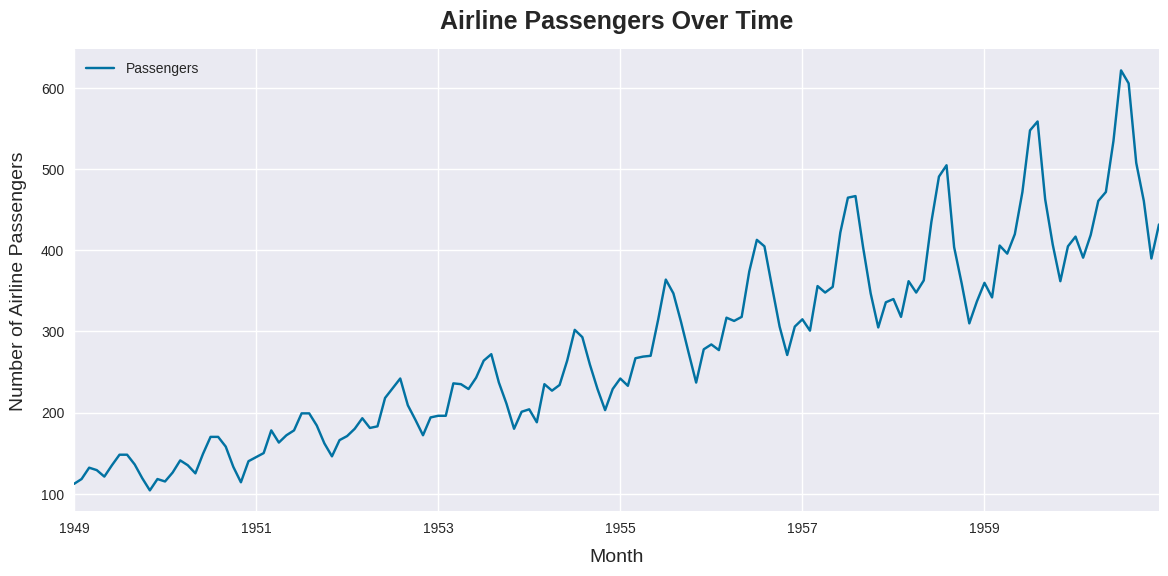

In [43]:
## visualize the timeseries plot
data.plot(figsize=(14,6))
plt.title("Airline Passengers Over Time", pad=15, fontweight='bold', fontsize=18)
plt.xlabel("Month", fontsize=14, labelpad=10)
plt.ylabel("Number of Airline Passengers", fontsize=14, labelpad=10)
plt.show()

**Setting Up pycaret**

In [44]:
## imporrt necesary libraries for pycaret
from pycaret.time_series import *
from pycaret.time_series import TSForecastingExperiment

In [45]:
## setting up the pycaret
exp = TSForecastingExperiment()
exp.setup(data=data,target='Passengers',fh=12,coverage=0.95)

,Description,Value
0,session_id,322
1,Target,Passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


**checking for statiscal tests**

In [46]:
## checking for statiscal tests such as Adf and kpss for stationarity
exp.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,144.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,280.298611
3,Summary,Statistics,Transformed,Median,,265.5
4,Summary,Statistics,Transformed,Standard Deviation,,119.966317
5,Summary,Statistics,Transformed,Variance,,14391.917201
6,Summary,Statistics,Transformed,Kurtosis,,-0.364942
7,Summary,Statistics,Transformed,Skewness,,0.58316
8,Summary,Statistics,Transformed,# Distinct Values,,118.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1606.083817


**SELECTING ORDERS p,d,q and P,D,Q**
* To select p,d,q and P,D,Q we first make the data stationary.
* To identify order p,d,q ,for AR(p),we use the pacf and MA(q) we use the acf plot , the order p is identified by selecting the maximum non zero significant lag followed by a sharp decline

In [47]:
## The Differenced Plot
fig = exp.plot_model(
    plot="diff",
    data_kwargs=dict(order_list=[1,3],acf=True,pacf=True),
    fig_kwargs=dict(
        template="ggplot2+seaborn",
        font=dict(size=16, family='Times New Roman')
    ),
    return_fig=True
)

## enhance the layout and title
fig.update_layout(
    title=dict(
        text='<b>DETRENDED PLOTS (NON-SEASONAL PART) </b>',
        x=0.5,
        xanchor='center',
        font=dict(
            size=20,
            color='#1f77b4',
            family='Times New Roman'
        ),
        pad=dict(t=20),

    ),
    # Additional enhancements
    plot_bgcolor='white',
    paper_bgcolor='#f5f5f5',
    margin=dict(l=50, r=50, t=80, b=50),
    showlegend=True,
    separators='.,' ,
    # width=1200,
    # height=600
)

## Optional: Add a subtle grid and adjust axes if needed
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

fig.show()

In [48]:
 ## Detrended and Differeenced Plot
fig = exp.plot_model(
    plot="diff",
    data_kwargs=dict(lags_list=[[1,12]],acf=True,pacf=True),
    fig_kwargs=dict(
        template="ggplot2+seaborn",
        font=dict(size=16, family='Times New Roman')
    ),
    return_fig=True
)

## enhance the layout and title
fig.update_layout(
    title=dict(
        text='<b> SEASONAL PART OF AIRLINE PASSENGERS (DETRENDED&DEASONALIZED) </b>',
        x=0.5,
        xanchor='center',
        font=dict(
            size=20,
            color='#1f77b4',
            family='Times New Roman'
        ),
        pad=dict(t=20),

    ),
    # Additional enhancements
    plot_bgcolor='white',
    paper_bgcolor='#f5f5f5',
    margin=dict(l=50, r=50, t=80, b=50),
    showlegend=True,
    separators='.,' ,
    # width=1200,
    # height=600
)

## Optional: Add a subtle grid and adjust axes if needed
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

fig.show()


**Selecting the Best Combinations**
* AR(1)
* MA(1)
* ARIMA(1,1,1)
* SARIMA(1,1,1)(1,1,2,12)
* SARIMA(1,1,1)(1,1,1,12)
* SARIMA(1,1,1)(2,1,1,12)
* SARIMA(1,1,1)(3,1,1,12)
* RANDOM WALK (0,1,0) with Constant
* RANDOM WALK (0,1,0) without Constant

In [49]:
exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [50]:
## AR
AR = exp.create_model('arima',order=(1,0,0),seasonal_order=(0,0,0,12),with_intercept=True,cross_validation=False)


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,3.3760,3.7460,102.7986,129.4174,0.1972,0.2297,-2.0236


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Selecting the Models.**

In [51]:
## getting the parameters of the AR model
AR.get_fitted_params()

{'intercept': 9.977845579953016,
 'ar.L1': 0.9618272466611557,
 'sigma2': 965.4192260038726,
 'aic': 1290.3755645799206,
 'aicc': 1290.5630645799206,
 'bic': 1299.0239703476798,
 'hqic': 1293.8898798972814}

In [52]:
## the MA
MA = exp.create_model('arima',order=(0,0,1),seasonal_order=(0,0,0,12),with_intercept=True,cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,6.6833,6.4226,203.5061,221.8905,0.4119,0.5336,-7.8881


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [53]:
## ARIMA
ARIMA111 = exp.create_model('arima',order=(1,1,1),seasonal_order=(0,0,0,12),with_intercept=True,cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,1.9990,2.3844,60.8693,82.3772,0.1166,0.1256,-0.2250


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [54]:
## SARIMA
SARIMA111111= exp.create_model('arima',order=(1,1,1),seasonal_order=(1,1,1,12),with_intercept=True,cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.6134,0.6874,18.6784,23.7470,0.0421,0.0406,0.8982


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [55]:
## SARIMA
SARIMA11112= exp.create_model('arima',order=(1,1,1),seasonal_order=(1,1,2,12),with_intercept=True,cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.4740,0.5429,14.4320,18.7576,0.0321,0.0312,0.9365


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [56]:
## SARIMA
SARIMA111211= exp.create_model('arima',order=(1,1,1),seasonal_order=(2,1,2,12),with_intercept=True,cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.5931,0.6640,18.0590,22.9395,0.0404,0.0391,0.9050


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [57]:
## Random Walk without constant
rw_without_constant = exp.create_model('arima',order=(0,1,0),seasonal_order=(0,0,0,12),with_intercept=False,cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.4959,2.9807,76.0000,102.9765,0.1425,0.1612,-0.9143


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [58]:
rw_with_constant = exp.create_model('arima',order=(0,1,0),seasonal_order=(0,0,0,12),with_intercept=True,cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.1776,2.6822,66.3079,92.6664,0.1242,0.1381,-0.5502


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**labelling**

In [59]:
## labelling
my_models = [rw_without_constant,rw_with_constant,AR,MA,ARIMA111,SARIMA111111,SARIMA11112]
my_model_lablels = ['Random Walk Witthout Constant','Random Walk With Constant','AR(1)','MA(1)','ARIMA(1,1,1)','SARIMA(1,1,1)(1,1,1,12)','SARIMA(1,1,1)(1,1,1,12)']

In [60]:
my_models

[ARIMA(order=(0, 1, 0), seasonal_order=(0, 0, 0, 12), with_intercept=False),
 ARIMA(order=(0, 1, 0), seasonal_order=(0, 0, 0, 12)),
 ARIMA(seasonal_order=(0, 0, 0, 12)),
 ARIMA(order=(0, 0, 1), seasonal_order=(0, 0, 0, 12)),
 ARIMA(order=(1, 1, 1), seasonal_order=(0, 0, 0, 12)),
 ARIMA(order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)),
 ARIMA(order=(1, 1, 1), seasonal_order=(1, 1, 2, 12))]

In [61]:
my_model_lablels

['Random Walk Witthout Constant',
 'Random Walk With Constant',
 'AR(1)',
 'MA(1)',
 'ARIMA(1,1,1)',
 'SARIMA(1,1,1)(1,1,1,12)',
 'SARIMA(1,1,1)(1,1,1,12)']

**Comparisons for all the Models**

In [62]:
exp.compare_models(include=my_models, cross_validation=False)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
6,ARIMA,0.4740,0.5429,14.4320,18.7576,0.0321,0.0312,0.9365,3.9800
5,ARIMA,0.6134,0.6874,18.6784,23.7470,0.0421,0.0406,0.8982,1.8600
4,ARIMA,1.9990,2.3844,60.8693,82.3772,0.1166,0.1256,-0.2250,0.4600
1,ARIMA,2.1776,2.6822,66.3079,92.6664,0.1242,0.1381,-0.5502,0.0300
0,ARIMA,2.4959,2.9807,76.0000,102.9765,0.1425,0.1612,-0.9143,0.0300
2,ARIMA,3.3760,3.7460,102.7986,129.4174,0.1972,0.2297,-2.0236,0.0900
3,ARIMA,6.6833,6.4226,203.5061,221.8905,0.4119,0.5336,-7.8881,0.1500


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

ARIMA(order=(1, 1, 1), seasonal_order=(1, 1, 2, 12))

In [63]:
## displaying the dataframe
model_comparisons_df = exp.pull()
## display the dattaframe
model_comparisons_df

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
6,ARIMA,0.4740,0.5429,14.4320,18.7576,0.0321,0.0312,0.9365,3.98
5,ARIMA,0.6134,0.6874,18.6784,23.7470,0.0421,0.0406,0.8982,1.86
4,ARIMA,1.9990,2.3844,60.8693,82.3772,0.1166,0.1256,-0.2250,0.46
1,ARIMA,2.1776,2.6822,66.3079,92.6664,0.1242,0.1381,-0.5502,0.03
0,ARIMA,2.4959,2.9807,76.0000,102.9765,0.1425,0.1612,-0.9143,0.03
2,ARIMA,3.3760,3.7460,102.7986,129.4174,0.1972,0.2297,-2.0236,0.09
3,ARIMA,6.6833,6.4226,203.5061,221.8905,0.4119,0.5336,-7.8881,0.15


**Summary of the best Mode**

In [64]:
## summary of the best moodel
SARIMA11112.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -442.079
Date:                                 Fri, 11 Apr 2025   AIC                            898.159
Time:                                         11:42:33   BIC                            917.613
Sample:                                     01-31-1949   HQIC                           906.058
                                          - 12-31-1959                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0010      0.067      0.015      0.988      -0.130       0.132
ar.L1         -0.3464      0.400     -0.866      0.387      -1.131       0.438
ma.L1          0.0485      0.406      0.120      0.905      -0.747       0.844
ar.S.L12       0.9977      0.148      6.726      0.000       0.707       1.288
ma.S.L12      -1.3030      1.336     -0.975      0.330      -3.922       1.316
ma.S.L24       0.3334      0.380      0.878      0.380      -0.411       1.077
sigma2        86.6158    105.458      0.821      0.411    -120.078     293.309
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.61
Prob(Q):                              0.97   Prob(JB):                         0.74
Heteroskedasticity (H):               1.64   Skew:                            -0.09
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Forecast of the best model**

In [65]:
##  ## Detrended and Differeenced Plot
fig = exp.plot_model(
    estimator=SARIMA11112,
    plot="forecast",
    data_kwargs=dict(fh=24,labels=['SARIMA(1,1,1)x(1,1,2,12)']),
    fig_kwargs=dict(
        template="ggplot2+seaborn",
        font=dict(size=16, family='Times New Roman')
    ),
    return_fig=True
)

## enhance the layout and title
fig.update_layout(
    title=dict(
        text='<b>SARIMA(1,1,1)x(1,1,2,12) 24 MONTHS FORECAST</b>',
        x=0.5,
        xanchor='center',
        font=dict(
            size=20,
            color='#1f77b4',
            family='Times New Roman'
        ),
        pad=dict(t=20),

    ),
    # Additional enhancements
    plot_bgcolor='white',
    paper_bgcolor='#f5f5f5',
    margin=dict(l=50, r=50, t=80, b=50),
    showlegend=True,
    separators='.,' ,
    # width=1200,
    # height=600
)

## Optional: Add a subtle grid and adjust axes if needed
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

fig.show()


In [66]:
##  ## Detrended and Differeenced Plot
fig = exp.plot_model(
    estimator=SARIMA11112,
    plot="diagnostics",
    # data_kwargs=dict(),
    fig_kwargs=dict(
        template="ggplot2+seaborn",
        font=dict(size=16, family='Times New Roman')
    ),
    return_fig=True
)

## enhance the layout and title
fig.update_layout(
    title=dict(
        text='<b>SARIMA(1,1,1)x(1,1,2,12) MODEL DIAGNOSTICS </b>',
        x=0.5,
        xanchor='center',
        font=dict(
            size=20,
            color='#1f77b4',
            family='Times New Roman'
        ),
        pad=dict(t=20),

    ),
    # Additional enhancements
    plot_bgcolor='white',
    paper_bgcolor='#f5f5f5',
    margin=dict(l=50, r=50, t=80, b=50),
    showlegend=True,
    separators='.,' ,
    # width=1200,
    # height=600
)

## Optional: Add a subtle grid and adjust axes if needed
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

fig.show()


**Augmented Dickey Fuller Test**

In [67]:
## checing for stationarity
exp.check_stats(test='kpss', estimator=SARIMA11112)

,Test,Test Name,Data,Property,Setting,Value
0,Stationarity,KPSS,Residual,Trend Stationarity,{'alpha': 0.05},True
1,Stationarity,KPSS,Residual,p-value,{'alpha': 0.05},0.1
2,Stationarity,KPSS,Residual,Test Statistic,{'alpha': 0.05},0.031125
3,Stationarity,KPSS,Residual,Critical Value 10%,{'alpha': 0.05},0.119
4,Stationarity,KPSS,Residual,Critical Value 5%,{'alpha': 0.05},0.146
5,Stationarity,KPSS,Residual,Critical Value 2.5%,{'alpha': 0.05},0.176
6,Stationarity,KPSS,Residual,Critical Value 1%,{'alpha': 0.05},0.216


In [68]:
## kpss test
##  ## Detrended and Differeenced Plot
fig = exp.plot_model(
    estimator=AR,
    plot="forecast",
    data_kwargs=dict(fh=24,labels=['AR(1)']),
    fig_kwargs=dict(
        template="ggplot2+seaborn",
        font=dict(size=16, family='Times New Roman')
    ),
    return_fig=True
)

## enhance the layout and title
fig.update_layout(
    title=dict(
        text='<b> AR(1) 24 MONTHS FORECAST</b>',
        x=0.5,
        xanchor='center',
        font=dict(
            size=20,
            color='#1f77b4',
            family='Times New Roman'
        ),
        pad=dict(t=20),

    ),
    # Additional enhancements
    plot_bgcolor='white',
    paper_bgcolor='#f5f5f5',
    margin=dict(l=50, r=50, t=80, b=50),
    showlegend=True,
    separators='.,' ,
    # width=1200,
    # height=600
)

## Optional: Add a subtle grid and adjust axes if needed
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

fig.show()


In [69]:
## kpss test
##  ## Detrended and Differeenced Plot
fig = exp.plot_model(
    estimator=MA,
    plot="forecast",
    data_kwargs=dict(fh=24,labels=['MA (1)']),
    fig_kwargs=dict(
        template="ggplot2+seaborn",
        font=dict(size=16, family='Times New Roman')
    ),
    return_fig=True
)

## enhance the layout and title
fig.update_layout(
    title=dict(
        text='<b> MA(1) 24 MONTHS FORECAST</b>',
        x=0.5,
        xanchor='center',
        font=dict(
            size=20,
            color='#1f77b4',
            family='Times New Roman'
        ),
        pad=dict(t=20),

    ),
    # Additional enhancements
    plot_bgcolor='white',
    paper_bgcolor='#f5f5f5',
    margin=dict(l=50, r=50, t=80, b=50),
    showlegend=True,
    separators='.,' ,
    # width=1200,
    # height=600
)

## Optional: Add a subtle grid and adjust axes if needed
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

fig.show()


In [70]:
## kpss test
##  ## Detrended and Differeenced Plot
fig = exp.plot_model(
    estimator=my_models,
    plot="forecast",
    data_kwargs=dict(fh=24,labels=my_model_lablels),
    fig_kwargs=dict(
        template="ggplot2+seaborn",
        font=dict(size=16, family='Times New Roman')
    ),
    return_fig=True
)

## enhance the layout and title
fig.update_layout(
    title=dict(
        text='<b> CLASSICAL MODELS COMPARISON 24 MONTHS FORECAST</b>',
        x=0.5,
        xanchor='center',
        font=dict(
            size=20,
            color='#1f77b4',
            family='Times New Roman'
        ),
        pad=dict(t=20),

    ),
    # Additional enhancements
    plot_bgcolor='white',
    paper_bgcolor='#f5f5f5',
    margin=dict(l=50, r=50, t=80, b=50),
    showlegend=True,
    separators='.,' ,
    # width=1200,
    # height=600
)

## Optional: Add a subtle grid and adjust axes if needed
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

fig.show()


**AUTO ARIMA IN PYCARET**

In [71]:
## performing Auto arirma
auto_arima = exp.create_model('auto_arima',cross_validation=False,information_criterion='aic',start_p=0,start_q=0,max_p=2,max_q=2,seasonal=True,stepwise=True)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.4445,0.5028,13.5342,17.3703,0.0286,0.0285,0.9455


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [72]:
## performing Auto arirma
auto_arima_fast  = exp.create_model('auto_arima',cross_validation=False,information_criterion='aic',start_p=0,start_q=0,max_p=5,max_q=5,seasonal=True,stepwise=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.3743,0.4569,11.3967,15.7842,0.0238,0.0238,0.9550


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [73]:
## getting the parameters
auto_arima.get_fitted_params()

{'intercept': 4.724899375285367,
 'ar.L1': 0.681611142675542,
 'ar.L2': 0.16392261548159673,
 'sigma2': 103.15952094729975,
 'order': (2, 0, 0),
 'seasonal_order': (0, 1, 0, 12),
 'aic': 906.0746247095567,
 'aicc': 906.4224507965132,
 'bic': 917.2245916806849,
 'hqic': 910.6026777476368}

In [74]:
auto_arima_fast.get_fitted_params()

{'intercept': 0.1545598434275702,
 'ar.L1': 0.6352616617441774,
 'ar.L2': 0.23561174101200488,
 'ar.S.L12': 0.9599432158846443,
 'ma.S.L12': -1.2048874751701764,
 'ma.S.L24': 0.33217123418442374,
 'sigma2': 88.2740488190707,
 'order': (2, 0, 0),
 'seasonal_order': (1, 1, 2, 12),
 'aic': 901.9572329434823,
 'aicc': 902.9572329434823,
 'bic': 921.4696751429566,
 'hqic': 909.8813257601224}

In [75]:
## get parms c
auto_arima_fast.get_param_defaults()

{'start_p': 2,
 'd': None,
 'start_q': 2,
 'max_p': 5,
 'max_d': 2,
 'max_q': 5,
 'start_P': 1,
 'D': None,
 'start_Q': 1,
 'max_P': 2,
 'max_D': 1,
 'max_Q': 2,
 'max_order': 5,
 'sp': 1,
 'seasonal': True,
 'stationary': False,
 'information_criterion': 'aic',
 'alpha': 0.05,
 'test': 'kpss',
 'seasonal_test': 'ocsb',
 'stepwise': True,
 'n_jobs': 1,
 'start_params': None,
 'trend': None,
 'method': 'lbfgs',
 'maxiter': 50,
 'offset_test_args': None,
 'seasonal_test_args': None,
 'suppress_warnings': False,
 'error_action': 'warn',
 'trace': False,
 'random': False,
 'random_state': None,
 'n_fits': 10,
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': None,
 'with_intercept': True,
 'update_pdq': True,
 'time_varying_regression': False,
 'enforce_stationarity': True,
 'enforce_invertibility': True,
 'simple_differencing': False,
 'measurement_error': False,
 'mle_regression': True,
 'hamilton_representation': False,
 'concentrate_scale': False}

In [76]:
## getting summary
auto_arima_fast.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(1, 1, [1, 2], 12)   Log Likelihood                -443.979
Date:                                 Fri, 11 Apr 2025   AIC                            901.957
Time:                                         11:45:23   BIC                            921.470
Sample:                                     01-31-1949   HQIC                           909.881
                                          - 12-31-1959                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1546      0.708      0.218      0.827      -1.232       1.542
ar.L1          0.6353      0.091      6.978      0.000       0.457       0.814
ar.L2          0.2356      0.090      2.631      0.009       0.060       0.411
ar.S.L12       0.9599      0.184      5.214      0.000       0.599       1.321
ma.S.L12      -1.2049      0.336     -3.587      0.000      -1.863      -0.547
ma.S.L24       0.3322      0.118      2.814      0.005       0.101       0.564
sigma2        88.2740     19.755      4.468      0.000      49.554     126.994
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.09
Prob(Q):                              0.96   Prob(JB):                         0.58
Heteroskedasticity (H):               1.56   Skew:                            -0.07
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
## summary for arima
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -449.037
Date:                            Fri, 11 Apr 2025   AIC                            906.075
Time:                                    11:45:23   BIC                            917.225
Sample:                                01-31-1949   HQIC                           910.603
                                     - 12-31-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7249      1.967      2.402      0.016       0.870       8.580
ar.L1          0.6816      0.097      6.996      0.000       0.491       0.873
ar.L2          0.1639      0.094      1.739      0.082      -0.021       0.349
sigma2       103.1595     12.905      7.994      0.000      77.867     128.452
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.37
Prob(Q):                              0.90   Prob(JB):                         0.83
Heteroskedasticity (H):               1.42   Skew:                            -0.02
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
## auto arima augmeneted
auto_arima_augmeneted = exp.create_model('auto_arima',cross_validation=False,information_criterion='aic',start_p=0,start_q=0,max_p=5,max_q=5,seasonal=True,stepwise=False,d=1,D=1)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.6697,0.7446,20.3934,25.7232,0.0461,0.0444,0.8806


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Comparison**

In [79]:
### comparison
exp.compare_models(include=[auto_arima,auto_arima_fast,auto_arima_augmeneted],cross_validation=False)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:48:54
Status,. . . . . . . . . . . . . . . . . .,Fitting Auto ARIMA
Estimator,. . . . . . . . . . . . . . . . . .,Auto ARIMA


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
1,Auto ARIMA,0.3743,0.4569,11.3967,15.7842,0.0238,0.0238,0.9550,157.6300
0,Auto ARIMA,0.4445,0.5028,13.5342,17.3703,0.0286,0.0285,0.9455,15.0900


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
1,Auto ARIMA,0.3743,0.4569,11.3967,15.7842,0.0238,0.0238,0.9550,157.6300
0,Auto ARIMA,0.4445,0.5028,13.5342,17.3703,0.0286,0.0285,0.9455,15.0900
2,Auto ARIMA,0.6697,0.7446,20.3934,25.7232,0.0461,0.0444,0.8806,150.8500


AutoARIMA(random_state=322, sp=12, start_p=0, start_q=0, stepwise=False,
          suppress_warnings=True)

In [81]:
## coverting the Auto Arima results to dataframe
auto_arima_metrics_df = exp.pull()
auto_arima_metrics_df

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
1,Auto ARIMA,0.3743,0.4569,11.3967,15.7842,0.0238,0.0238,0.9550,157.63
0,Auto ARIMA,0.4445,0.5028,13.5342,17.3703,0.0286,0.0285,0.9455,15.09
2,Auto ARIMA,0.6697,0.7446,20.3934,25.7232,0.0461,0.0444,0.8806,150.85


Summary of Auto Arima

In [82]:
auto_arima_augmeneted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(0, 1, 3)x(0, 1, [], 12)   Log Likelihood                -445.004
Date:                             Fri, 11 Apr 2025   AIC                            900.008
Time:                                     11:58:03   BIC                            913.903
Sample:                                 01-31-1949   HQIC                           905.650
                                      - 12-31-1959                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4942      0.599      0.825      0.409      -0.679       1.668
ma.L1         -0.2598      0.089     -2.924      0.003      -0.434      -0.086
ma.L2          0.1345      0.113      1.192      0.233      -0.087       0.356
ma.L3         -0.2485      0.103     -2.408      0.016      -0.451      -0.046
sigma2       103.4452     13.456      7.687      0.000      77.071     129.819
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.29
Prob(Q):                              0.85   Prob(JB):                         0.86
Heteroskedasticity (H):               1.60   Skew:                            -0.06
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
## plotting
## kpss test
##  ## Detrended and Differeenced Plot
fig = exp.plot_model(
    estimator=[auto_arima_augmeneted,auto_arima],
    plot="forecast",
    data_kwargs=dict(fh=36,labels=['AUTO SARIMA(0,1,3)x(0,1,0,12)','AUTO SARIMA(2, 0, 0)x(0, 1, 0, 12)']),
    fig_kwargs=dict(
        template="ggplot2+seaborn",
        font=dict(size=16, family='Times New Roman')
    ),
    return_fig=True
)

## enhance the layout and title
fig.update_layout(
    title=dict(
        text='<b> AUTO SARIMA(0,1,3)x(0,1,0,12) VS AUTO SARIMA(2, 0, 0)x(0, 1, 0, 12) 48 MONTHS FORECAST</b>',
        x=0.5,
        xanchor='center',
        font=dict(
            size=20,
            color='#1f77b4',
            family='Times New Roman'
        ),
        pad=dict(t=20),

    ),
    # Additional enhancements
    plot_bgcolor='white',
    paper_bgcolor='#f5f5f5',
    margin=dict(l=50, r=50, t=80, b=50),
    showlegend=True,
    separators='.,' ,
    # width=1200,
    # height=600
)

## Optional: Add a subtle grid and adjust axes if needed
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

fig.show()


Key Insights.  
* While Auto SARIMA(2, 0, 0)x(0, 1, 0, 12) didn’t explicitly capture the trend component, it surprisingly outperformed the more complex Auto SARIMA(0, 1, 3)x(0, 1, 0, 12) on the holdout set—especially in forecasting multiple steps ahead.
* In addition to that The model that excelled during training struggled to generalize patterns over longer horizons, whereas the simpler model demonstrated greater stability.

**Predictions**

In [99]:
## auto arima predictions
forecast_holdout_df = exp.predict_model(estimator=auto_arima_augmeneted, fh=12)


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Auto ARIMA,0.6697,0.7446,20.3934,25.7232,0.0461,0.0444,0.8806


In [100]:
forecast_holdout_df


,y_pred
1960-01,426.3785
1960-02,410.5073
1960-03,470.6937
1960-04,461.1879
1960-05,485.6821
1960-06,538.1763
1960-07,614.6705
1960-08,626.1646
1960-09,530.6588
1960-10,475.1530


**Finanlizing the Model**

In [103]:
## finalizing the model
best_model = exp.finalize_model(auto_arima_augmeneted)

In [105]:
## kpss test
##  ## Detrended and Differeenced Plot
fig = exp.plot_model(
    estimator=best_model,
    plot="forecast",
    data_kwargs=dict(fh=24,labels=['Best Model']),
    fig_kwargs=dict(
        template="ggplot2+seaborn",
        font=dict(size=16, family='Times New Roman')
    ),
    return_fig=True
)

## enhance the layout and title
fig.update_layout(
    title=dict(
        text='<b> BEST MODEL 24 MONTHS FORECAST</b>',
        x=0.5,
        xanchor='center',
        font=dict(
            size=20,
            color='#1f77b4',
            family='Times New Roman'
        ),
        pad=dict(t=20),

    ),
    # Additional enhancements
    plot_bgcolor='white',
    paper_bgcolor='#f5f5f5',
    margin=dict(l=50, r=50, t=80, b=50),
    showlegend=True,
    separators='.,' ,
    # width=1200,
    # height=600
)

## Optional: Add a subtle grid and adjust axes if needed
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

fig.show()


accessing the predictions and converting them into a dataframe

In [108]:
best_model_predictionsdf= exp.predict_model(best_model,fh=24,return_pred_int=True,coverage=0.95)
best_model_predictionsdf

,y_pred,lower,upper
1961-01,450.1704,429.2903,471.0505
1961-02,423.1442,399.1016,447.1869
1961-03,466.0399,439.2049,492.8749
1961-04,490.6299,461.2669,519.9929
1961-05,508.1324,476.4425,539.8224
1961-06,575.6939,541.8365,609.5513
1961-07,663.9021,628.0079,699.7962
1961-08,658.1460,620.3246,695.9674
1961-09,549.9628,510.3077,589.6180
1961-10,496.3431,454.9354,537.7508
